In [1]:
# mappper

def mapper(centoids, point):
    pass

In [2]:
a = [[1,2,3],[4,5,6]]
b = [[4,5,6],[1,2,3]]

In [3]:
a==b

False

In [4]:
a = [1,2,3]
print('key'+'\t',a)

key	 [1, 2, 3]


In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
file = open('shot_logs.csv')
c = 0
for line in file.readlines():
    line = line.strip()
    line = line.split(',')
    if line[0] == 'GAME_ID':
        continue
    shot_dist = line[12]
    close_def_dist = line[18]
    shot_clock = line[9]
    player_name = line[21]
    short_status = line[14]
    if shot_clock == '':
        continue
    print(line)
    datapoint = np.array([shot_dist,close_def_dist,shot_clock])
    print('player_name: ',player_name)
    print('short status:',short_status)
    print(datapoint)

    c+=1
    if c==3:
        break

['21400899', '"MAR 04', ' 2015 - CHA @ BKN"', 'A', 'W', '24', '1', '1', '1:09', '10.8', '2', '1.9', '7.7', '2', 'made', '"Anderson', ' Alan"', '101187', '1.3', '1', '2', 'brian roberts', '203148']
player_name:  brian roberts
short status: made
['7.7' '1.3' '10.8']
['21400899', '"MAR 04', ' 2015 - CHA @ BKN"', 'A', 'W', '24', '2', '1', '0:14', '3.4', '0', '0.8', '28.2', '3', 'missed', '"Bogdanovic', ' Bojan"', '202711', '6.1', '0', '0', 'brian roberts', '203148']
player_name:  brian roberts
short status: missed
['28.2' '6.1' '3.4']
['21400899', '"MAR 04', ' 2015 - CHA @ BKN"', 'A', 'W', '24', '4', '2', '11:47', '10.3', '2', '1.9', '17.2', '2', 'missed', '"Brown', ' Markel"', '203900', '3.4', '0', '0', 'brian roberts', '203148']
player_name:  brian roberts
short status: missed
['17.2' '3.4' '10.3']


In [8]:
datapoint = datapoint.astype(np.float64)

In [9]:
datapoint

array([17.2,  3.4, 10.3])

In [10]:
centroid = np.array([28.2,6.1,3.4])
centroid.shape

(3,)

In [11]:
distance = np.zeros(4)

In [12]:
distance

array([0., 0., 0., 0.])

In [1]:
from numpy.linalg import norm

In [14]:
row = norm(datapoint - centroid, axis = 0 )

In [15]:
row

13.262729734108284

In [16]:
distance[1] = np.square(row)

In [17]:
distance

array([  0. , 175.9,   0. ,   0. ])

In [18]:
a = np.argmin(distance,axis=0)

In [19]:
a = list()

In [20]:
b = np.array([0,1])

In [21]:
a.append(b)

In [22]:
a

[array([0, 1])]

In [23]:
a.append(np.array([3,3]))

In [24]:
a

[array([0, 1]), array([3, 3])]

In [25]:
a = np.array(a)

In [26]:
a

array([[0, 1],
       [3, 3]])

In [27]:
a = np.sum(a,axis=0)

In [28]:
a

array([3, 4])

In [29]:
a = np.array([1,2])
b = np.array([3,4])

In [30]:
a + b

array([4, 6])

In [31]:
dict1 = {1: 1, 2: 9, 3: 4}

In [32]:
print(dict1)

{1: 1, 2: 9, 3: 4}


In [33]:
from operator import itemgetter

In [2]:
import pandas as pd
df = pd.read_csv("shot_logs.csv")
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [22]:
import sys
import numpy as np
from numpy.linalg import norm
file = open('shot_logs.csv')

# centroids = np.array(sys.argv[1], sys.argv[2], sys.argv[3],sys.argv[4] )       # any 4 random data points
centroids = np.array([[7.7,1.3,10.8],[22.8,5.3,6.8],[24.2,11.1,20.8],[6.9,4.9,16]])

cluster_map = dict()
c = 0
for line in file.readlines():

    c += 1
    if c == 1000:
        break

    line = line.strip()
    line = line.split(',')

    if line[0] == "GAME_ID":
        continue

    if line[9] =='':   # skip first row, and, shot_clock is the only column with missing values
        continue
    shot_dist = float(line[12])
    close_def_dist = float(line[18])
    shot_clock = float(line[9])
    player_name = line[21].lower()

    if not line[15].startswith('"'):
        player_name = line[20].lower()
        close_def_dist = float(line[17])
    
    

    datapoint = np.array([shot_dist,close_def_dist,shot_clock])

    distance = np.zeros(len(centroids))
    for k in range(len(centroids)):

        row  = norm(datapoint - centroids[k], axis = 0)    
        distance[k] = np.square(row)
    
    nearest_cluster = np.argmin(distance,axis=0)

    if nearest_cluster in cluster_map:
        cluster_map[nearest_cluster].append([datapoint,1])

    else:
        cluster_map[nearest_cluster] = list()
        cluster_map[nearest_cluster].append([datapoint,1])

# combiner


for key, val in cluster_map.items():
    temp = np.zeros(len(val[0][0]))  
    count = 0

    for v in val:
        temp += v[0] 
        count += v[1]
    cluster_map[key] = [temp,count]


reducer_input = list()
for key, val in cluster_map.items():
    zone = str(key)
    f = val[0][0]
    s = val[0][1]
    t = val[0][2]
    c = val[1]
    a = zone+"\t"+str(f)+"_"+str(s)+"_"+str(t)+"_"+str(c)
    print(a)
    reducer_input.append(a)


file.close()

0	3392.400000000003_1081.6_4008.700000000001_438
1	5041.500000000002_1213.4000000000003_2227.7000000000003_245
2	2102.499999999999_618.6999999999997_1654.2_92
3	1286.1000000000001_620.2000000000002_3660.3_202


In [24]:
for ele in reducer_input:
    print(ele)

0	3392.400000000003_1081.6_4008.700000000001_438
1	5041.500000000002_1213.4000000000003_2227.7000000000003_245
2	2102.499999999999_618.6999999999997_1654.2_92
3	1286.1000000000001_620.2000000000002_3660.3_202


In [28]:
# reducer 1


import sys
import numpy as np

updated_centroids = dict()
prev_centroids = dict()


for line in reducer_input:

    line = line.strip()
    line = line.split()
    centroid = line[0]

    datapoints = line[1].split('_')
    points = [float(x) for x in datapoints[0:3]]
    count = float(datapoints[3])
    datapoints = list()            # [[1,2,3],34]
    datapoints.append(points)
    datapoints.append(count)
    
        #datapoints is a list of partial sum and partial count from each mapper

    if centroid in updated_centroids:
        updated_centroids[centroid].append(datapoints)

    else:
        updated_centroids[centroid] = list()
        updated_centroids[centroid].append(datapoints)    # { 0 : [[[1,2,3],34],[[6,8,3],78]]}

# updated centroids has now keys as labels of centroids, but not the actual datapoint of centroids
# values against each centroid has a list of list. with inner lists as partial sums and counts from each mapper belonging to that centroid label
# now we need to get updated centroids for each cluster by taking mean of datapoints for each cluster
for key, val in updated_centroids.items():

    temp = np.zeros(len(val[0][0]))     # [0,0,0]
    count = 0

    for v in val:
        temp += np.array(v[0])
        count += v[1]
    updated_centroids[key] = temp/count   # total sum of all points divided by total number of points equals mean of all the datapoints in the cluster

final_centroids = list()
for key, val in updated_centroids.items():
    final_centroids.append(val)
    print(str(val[0])+"_"+str(val[1])+"_"+str(val[2]))

print(final_centroids)

7.7452054794520615_2.4694063926940637_9.152283105022834
20.57755102040817_4.952653061224491_9.09265306122449
22.853260869565208_6.724999999999997_17.980434782608697
6.366831683168318_3.0702970297029712_18.12029702970297
[array([7.74520548, 2.46940639, 9.15228311]), array([20.57755102,  4.95265306,  9.09265306]), array([22.85326087,  6.725     , 17.98043478]), array([ 6.36683168,  3.07029703, 18.12029703])]


In [29]:
print(final_centroids)

[array([7.74520548, 2.46940639, 9.15228311]), array([20.57755102,  4.95265306,  9.09265306]), array([22.85326087,  6.725     , 17.98043478]), array([ 6.36683168,  3.07029703, 18.12029703])]


In [ ]:
# mapper 2
# mapper 2 is for classification
import sys
import numpy as np
from numpy.linalg import norm

# final_centroids = list(sys.argv[1], sys.argv[2], sys.argv[3], sys.argv[4])  # store output of previous reducer in arguments
# 

results = dict()

for line in sys.stdin:

    line = line.strip()
    line = line.split(',')

    shot_dist = line[12]
    close_def_dist = line[18]
    shot_clock = line[9]
    player_name = line[21].lower()
    shot_status = line[14]

    if line[0] == 'GAME_ID'  or shot_clock =='':   # skip first row, and, shot_clock is the only column with missing values
        continue

    datapoint = np.array([shot_dist,close_def_dist,shot_clock])


    if player_name in ['james harden', 'chris paul', 'stephen curry', 'lebron james']:

        # find which zone this particular datapoint of this player lies in
        k = len(final_centroids)      # k = 4
        distance = np.zeros(k)
        for i in range(k):

            row = norm(datapoint-final_centroids[i], axis = 0)
            distance[i] = np.square(row)

        nearest_centroid = np.argmin(distance,axis = 0)

        # now for this player_name, this datapoint lies in the cluster nearest_centroid
        # now we need to keep track of shots missed and made in this record

        if player_name not in results:
            results[player_name] = dict()

        if nearest_centroid not in results[player_name]:
            results[player_name][nearest_centroid] = list()
        
        # now just append made and missed scores
        if shot_status == 'made':
            results[player_name][nearest_centroid].append(np.array([1,0]))

        else:
            results[player_name][nearest_centroid].append(np.array([0,1]))


    else:
        continue


# now we have a results dictionary with each player having the short status in each zone

# combiner
# transform the short status to total shots made and total shots missed
for key, val in results.items():

    # val is a dictionary of zones
    for zone in val:

        val[zone] = np.array(val[zone])
        val[zone] = np.sum(val[zone],axis=0)

# now we have results dictionary containing total made and missed shots in each zone for each of the four players

for key, val in results.items():

    player = key
    for k,v in val.items():
        zone = k
        shots_made = v[0]
        shots_missed = v[1]

        print(player + "\t" + str(zone)+"_"+str(shots_made)+"_"+str(shots_missed))

In [25]:
# mapper 1 testing
f = open('shot_logs.csv')
v = 0
for line in f.readlines():
    v +=1
    if v == 1000:
        break
    line = line.strip()
    line = line.split(',')

    if line[0] == "GAME_ID":
        continue

    if line[9] =='':   # skip first row, and, shot_clock is the only column with missing values
        continue
    shot_dist = float(line[12])
    close_def_dist = float(line[18])
    shot_clock = float(line[9])
    player_name = line[21].lower()

    if not line[15].startswith('"'):
        player_name = line[20].lower()
        close_def_dist = float(line[17])
    print(line)
    

['21400899', '"MAR 04', ' 2015 - CHA @ BKN"', 'A', 'W', '24', '1', '1', '1:09', '10.8', '2', '1.9', '7.7', '2', 'made', '"Anderson', ' Alan"', '101187', '1.3', '1', '2', 'brian roberts', '203148']
['21400899', '"MAR 04', ' 2015 - CHA @ BKN"', 'A', 'W', '24', '2', '1', '0:14', '3.4', '0', '0.8', '28.2', '3', 'missed', '"Bogdanovic', ' Bojan"', '202711', '6.1', '0', '0', 'brian roberts', '203148']
['21400899', '"MAR 04', ' 2015 - CHA @ BKN"', 'A', 'W', '24', '4', '2', '11:47', '10.3', '2', '1.9', '17.2', '2', 'missed', '"Brown', ' Markel"', '203900', '3.4', '0', '0', 'brian roberts', '203148']
['21400899', '"MAR 04', ' 2015 - CHA @ BKN"', 'A', 'W', '24', '5', '2', '10:34', '10.9', '2', '2.7', '3.7', '2', 'missed', '"Young', ' Thaddeus"', '201152', '1.1', '0', '0', 'brian roberts', '203148']
['21400899', '"MAR 04', ' 2015 - CHA @ BKN"', 'A', 'W', '24', '6', '2', '8:15', '9.1', '2', '4.4', '18.4', '2', 'missed', '"Williams', ' Deron"', '101114', '2.6', '0', '0', 'brian roberts', '203148']


In [30]:
# optimization

df = pd.read_csv('shot_logs.csv')



In [33]:
df.dropna(how='any',inplace=True)

In [36]:
x = df['SHOT_CLOCK']
Y = df['SHOT_DIST']
Z = df['CLOSE_DEF_DIST']

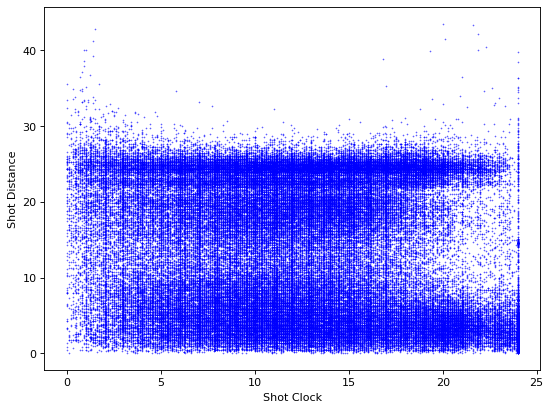

In [65]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.scatter(x,Y,s = 0.1,c='blue')
plt.xlabel('Shot Clock')
plt.ylabel('Shot Distance')
plt.savefig('shot_dist vs shot clock')
plt.show()

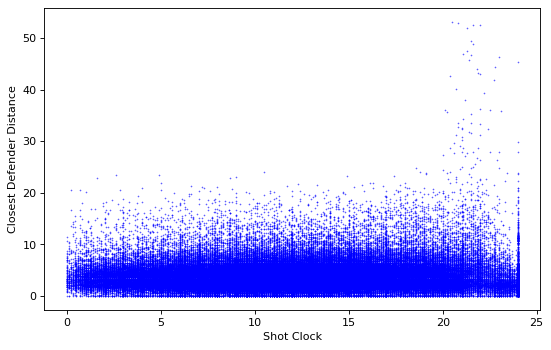

In [66]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 5), dpi=80)
plt.scatter(x,Z,s = 0.1,c='blue')
plt.xlabel('Shot Clock')
plt.ylabel('Closest Defender Distance')
plt.savefig('shot clock vs close_def_dist')
plt.show()

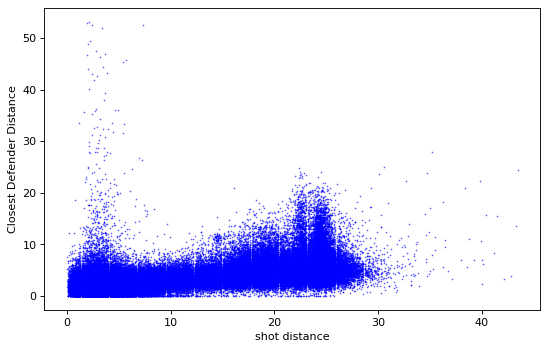

In [67]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 5), dpi=80)
plt.scatter(Y,Z,s = 0.1, c= 'blue')
plt.xlabel('shot distance')
plt.ylabel('Closest Defender Distance')
plt.savefig('shot_dist vs clos_def_dist')
plt.show()